<a href="https://colab.research.google.com/github/LeandroCoelhos/estudos_datascience/blob/main/Modulo_6_Aula_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Pré-processamento e Tunagem de Hiperparâmetros**

## **Uma terceira proposta de pré-processamento para o conjunto de dados do Titanic**
 

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
url1 = 'https://raw.githubusercontent.com/LeandroCoelhos/datasets/main/Titanic/train.csv'
url2 = 'https://raw.githubusercontent.com/LeandroCoelhos/datasets/main/Titanic/test.csv'
treino = pd.read_csv(url1)
teste = pd.read_csv(url2) 

n = treino.shape[0]#DEFINE ATÉ ONDE VAI O CONJUNTO DE TREINO

In [ ]:
targets = list(treino['Survived']) #atribuição a variável resposta em uma lista separada
targets.count()

NameError: ignored

In [ ]:
#Facilita para aplicar as normalizações e mudanças de variáveis no treino e no teste ao mesmo tempo
dataset = pd.concat([treino, teste]) 

In [ ]:
dataset.shape

(1309, 12)

In [ ]:
dataset.tail()#mostra o fim do conjunto de dados

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
413,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S
417,1309,NaN,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C


In [ ]:
# mapeando o sexo em 0 e 1 no data set completo, evita ter que fazer uma etapa para treino e outra para teste
dataset['Sex'] = dataset['Sex'].map({'male': 0, 'female': 1}) 

---

In [ ]:
# tranformação de variavel: pegar apenas o titulo presente no nome

def aux(x):
    return x.split(', ')[1].split('. ')[0]

dataset['Titulo'] = dataset['Name'].apply(aux)

In [ ]:
#agrupnando as categorias e mapeando-a
#busca por mais informações sobre os dados podem gerar melhores resultados
titulos = {
    "Capt": "Officer",
    "Col": "Officer",
    "Major": "Officer",
    "Jonkheer": "Royalty",
    "Don": "Royalty",
    "Sir" : "Royalty",
    "Dr": "Officer",
    "Rev": "Officer",
    "the Countess":"Royalty",
    "Mme": "Mrs",
    "Mlle": "Miss",
    "Ms": "Mrs",
    "Mr" : "Mr",
    "Mrs" : "Mrs",
    "Miss" : "Miss",
    "Master" : "Master",
    "Lady" : "Royalty"
}

dataset['Titulacao'] = dataset['Titulo'].map(titulos)

In [ ]:
dataset['Survived'].groupby(dataset['Titulacao']).describe()

,count,mean,std,min,25%,50%,75%,max
Titulacao,,,,,,,,
Master,40.0,0.575000,0.500641,0.0,0.0,1.0,1.00,1.0
Miss,184.0,0.701087,0.459031,0.0,0.0,1.0,1.00,1.0
Mr,517.0,0.156673,0.363844,0.0,0.0,0.0,0.00,1.0
Mrs,127.0,0.795276,0.405098,0.0,1.0,1.0,1.00,1.0
Officer,18.0,0.277778,0.460889,0.0,0.0,0.0,0.75,1.0
Royalty,5.0,0.600000,0.547723,0.0,0.0,1.0,1.00,1.0


---

In [ ]:
# variavel Cabine
dataset['Cabin']

0       NaN
1       C85
2       NaN
3      C123
4       NaN
       ... 
413     NaN
414    C105
415     NaN
416     NaN
417     NaN
Name: Cabin, Length: 1309, dtype: object

In [ ]:
# tranformação de variavel: pegar apenas a primeira letra da variavel Cabin, para identificar os nulos e os preenchidos, sabendo qual categoria ela pertence

def aux(x):
    return list(str(x))[0]

dataset['Cabin'] = dataset['Cabin'].apply(aux) 

In [ ]:
dataset['Cabin'].value_counts()

n    1014
C      94
B      65
D      46
E      41
A      22
F      21
G       5
T       1
Name: Cabin, dtype: int64

---

---

In [ ]:
# variavel parch e sibsb

In [ ]:
dataset['Familia'] = dataset['SibSp'] + dataset['Parch'] + 1 

In [ ]:
#defifindo o tamanho da família
#categorizar o tamanho da família pode ajudar nos resultados
def aux(x):
    if x == 1:
        return 'Sozinho'
    elif x <= 4:
        return 'Pequena'
    else:
        return 'Grande' 

dataset['FamiliaTipo'] = dataset['Familia'].apply(aux) #aplica diretamente em todo o dataset

FamiliaTipo
Grande     0.161290
Pequena    0.578767
Sozinho    0.303538
Name: Survived, dtype: float64

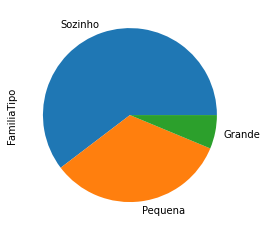

In [ ]:
dataset['FamiliaTipo'].value_counts().plot(kind = 'pie')

dataset['Survived'].groupby(dataset['FamiliaTipo']).mean()

In [ ]:
dataset.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Titulo,Titulacao,Familia,FamiliaTipo
0,1,0.0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,n,S,Mr,Mr,2,Pequena
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C,C,Mrs,Mrs,2,Pequena
2,3,1.0,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,n,S,Miss,Miss,1,Sozinho
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C,S,Mrs,Mrs,2,Pequena
4,5,0.0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,n,S,Mr,Mr,1,Sozinho


In [ ]:
# Dropando Variaveis que não serão mais utilizadas por terem sido substituidas

variaveis = ['PassengerId', 'Name', 'Ticket', 'Titulo']

dataset.drop(variaveis, axis = 1, inplace = True)

In [ ]:
dataset.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Titulacao,Familia,FamiliaTipo
0,0.0,3,0,22.0,1,0,7.2500,n,S,Mr,2,Pequena
1,1.0,1,1,38.0,1,0,71.2833,C,C,Mrs,2,Pequena
2,1.0,3,1,26.0,0,0,7.9250,n,S,Miss,1,Sozinho
3,1.0,1,1,35.0,1,0,53.1000,C,S,Mrs,2,Pequena
4,0.0,3,0,35.0,0,0,8.0500,n,S,Mr,1,Sozinho


In [ ]:
# Dummificação de várias variáveis de uma unica vez

dummificar = ['Pclass', 'Cabin', 'Embarked', 'Titulacao', 'FamiliaTipo']#lista de variáveis a serem dumificadas
dataset = pd.get_dummies(dataset, columns = dummificar) #função do pandas que faz a dumificação em massa

In [ ]:
dataset.head()

,Survived,Sex,Age,SibSp,Parch,Fare,Familia,Pclass_1,Pclass_2,Pclass_3,Cabin_A,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_T,Cabin_n,Embarked_C,Embarked_Q,Embarked_S,Titulacao_Master,Titulacao_Miss,Titulacao_Mr,Titulacao_Mrs,Titulacao_Officer,Titulacao_Royalty,FamiliaTipo_Grande,FamiliaTipo_Pequena,FamiliaTipo_Sozinho
0,0.0,0,22.0,1,0,7.2500,2,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0
1,1.0,1,38.0,1,0,71.2833,2,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0
2,1.0,1,26.0,0,0,7.9250,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1
3,1.0,1,35.0,1,0,53.1000,2,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0
4,0.0,0,35.0,0,0,8.0500,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1


In [ ]:
dataset.isnull().sum()

Survived               418
Sex                      0
Age                    263
SibSp                    0
Parch                    0
Fare                     1
Familia                  0
Pclass_1                 0
Pclass_2                 0
Pclass_3                 0
Cabin_A                  0
Cabin_B                  0
Cabin_C                  0
Cabin_D                  0
Cabin_E                  0
Cabin_F                  0
Cabin_G                  0
Cabin_T                  0
Cabin_n                  0
Embarked_C               0
Embarked_Q               0
Embarked_S               0
Titulacao_Master         0
Titulacao_Miss           0
Titulacao_Mr             0
Titulacao_Mrs            0
Titulacao_Officer        0
Titulacao_Royalty        0
FamiliaTipo_Grande       0
FamiliaTipo_Pequena      0
FamiliaTipo_Sozinho      0
dtype: int64

---

In [ ]:
# variavel idade
# usar quando tiver tudo numericore
#IMPUTAÇÂO COM KNN em todas os dados faltantes
from sklearn.impute import KNNImputer 

imputer = KNNImputer()#cria um objeto com a instancia KnnImputer

knnimp = imputer.fit(dataset.loc[:n-1, :].drop('Survived', axis = 1))#Faz o treinamento com os dados de treinamento

knnimp = imputer.transform(dataset.drop('Survived', axis = 1))#faz o preenchimento no conjutno de treino

In [ ]:
knnimp #este é o data set em formato de numpy array, precisa tranformar em data frame para retornar ao formato original

array([[ 0. , 22. ,  1. , ...,  0. ,  1. ,  0. ],
       [ 1. , 38. ,  1. , ...,  0. ,  1. ,  0. ],
       [ 1. , 26. ,  0. , ...,  0. ,  0. ,  1. ],
       ...,
       [ 0. , 38.5,  0. , ...,  0. ,  0. ,  1. ],
       [ 0. , 28.6,  0. , ...,  0. ,  0. ,  1. ],
       [ 0. , 16.6,  1. , ...,  0. ,  1. ,  0. ]])

In [ ]:
dataset = pd.DataFrame(knnimp, columns = dataset.columns[1:]) #tranforma novamente em um data frame preenchendo as lacunas
#columns para pegar de volta o nome das colunas que haviam se perdido na imputação

In [ ]:
dataset

,Sex,Age,SibSp,Parch,Fare,Familia,Pclass_1,Pclass_2,Pclass_3,Cabin_A,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_T,Cabin_n,Embarked_C,Embarked_Q,Embarked_S,Titulacao_Master,Titulacao_Miss,Titulacao_Mr,Titulacao_Mrs,Titulacao_Officer,Titulacao_Royalty,FamiliaTipo_Grande,FamiliaTipo_Pequena,FamiliaTipo_Sozinho
0,0.0,22.0,1.0,0.0,7.2500,2.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1.0,38.0,1.0,0.0,71.2833,2.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,1.0,26.0,0.0,0.0,7.9250,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,1.0,35.0,1.0,0.0,53.1000,2.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,0.0,35.0,0.0,0.0,8.0500,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,0.0,28.6,0.0,0.0,8.0500,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
1305,1.0,39.0,0.0,0.0,108.9000,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1306,0.0,38.5,0.0,0.0,7.2500,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
1307,0.0,28.6,0.0,0.0,8.0500,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0


In [ ]:
 dataset.isnull().sum()

Sex                    0
Age                    0
SibSp                  0
Parch                  0
Fare                   0
Familia                0
Pclass_1               0
Pclass_2               0
Pclass_3               0
Cabin_A                0
Cabin_B                0
Cabin_C                0
Cabin_D                0
Cabin_E                0
Cabin_F                0
Cabin_G                0
Cabin_T                0
Cabin_n                0
Embarked_C             0
Embarked_Q             0
Embarked_S             0
Titulacao_Master       0
Titulacao_Miss         0
Titulacao_Mr           0
Titulacao_Mrs          0
Titulacao_Officer      0
Titulacao_Royalty      0
FamiliaTipo_Grande     0
FamiliaTipo_Pequena    0
FamiliaTipo_Sozinho    0
dtype: int64

In [ ]:
#separa novamente o conjunto em treino e teste, depois de todas as modificações feitas
#a variável resposta do treino esta na Target, separada do conjunto
treino = dataset.loc[:n-1, :]
teste = dataset.loc[n:, :]

In [ ]:
treino.shape

(891, 30)

In [ ]:
# Padronização das variaveis
#faz a normalização subtraindo a média e dividindo pelo desvio padrão para ficar entre -2 e 2

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

aux0 = sc.fit_transform(treino[['Age', 'Fare']])
aux1 = pd.DataFrame(aux0, columns = ['Idade', 'Tarifa'])#cria novas colunas idade e tarifa normalizadas
treino = pd.concat([treino, aux1], axis = 1)#adiciona ao conunto de treino
treino.drop(['Age', 'Fare'], axis = 1, inplace = True) #deleta as colunas antigas não padronizadas

In [ ]:
#faz o vamaento de dados para o conjunto de teste, aplicando as mesmas etapas acima 
aux0 = sc.transform(teste[['Age', 'Fare']])
aux1 = pd.DataFrame(aux0, columns = ['Idade', 'Tarifa'])
teste = teste.reset_index()
teste = pd.concat([teste, aux1], axis = 1)
teste.drop(['Age', 'Fare', 'index'], axis = 1, inplace = True) 

In [ ]:
treino.head()

,Sex,SibSp,Parch,Familia,Pclass_1,Pclass_2,Pclass_3,Cabin_A,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_T,Cabin_n,Embarked_C,Embarked_Q,Embarked_S,Titulacao_Master,Titulacao_Miss,Titulacao_Mr,Titulacao_Mrs,Titulacao_Officer,Titulacao_Royalty,FamiliaTipo_Grande,FamiliaTipo_Pequena,FamiliaTipo_Sozinho,Idade,Tarifa
0,0.0,1.0,0.0,2.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,-0.575796,-0.502445
1,1.0,1.0,0.0,2.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.598609,0.786845
2,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,-0.282195,-0.488854
3,1.0,1.0,0.0,2.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.378408,0.420730
4,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.378408,-0.486337


---

## **Usando o Random Forest como modelo básico**

O Random Forest, assim como os demais modelos baseados em árvores de decisão, possui um output interessante, chamado **feature importance**. É um atributo que nos informa quais variáveis são mais importantes para o modelo. Dessa maneira, é possível fazer uma seleção das variáveis mais importantes para utilizar em um modelo final. 

In [ ]:
from sklearn.ensemble import RandomForestClassifier 

In [ ]:
modelo_base = RandomForestClassifier(max_depth=3) 
modelo_base.fit(treino, targets) 

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=3, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
#Array que mostra a importância de cada variável usada para contruir o modelo
modelo_base.feature_importances_

array([2.18079587e-01, 1.25771474e-02, 5.48547506e-03, 2.53463437e-02,
       3.59357872e-02, 6.53984038e-03, 5.33228547e-02, 5.09962984e-04,
       5.02941104e-03, 3.69806745e-04, 8.50403870e-03, 6.88194234e-03,
       2.85607416e-04, 2.27127663e-04, 0.00000000e+00, 5.68987693e-02,
       9.33391312e-03, 2.04223346e-03, 2.21841110e-03, 7.43218727e-03,
       7.62599296e-02, 2.77056915e-01, 4.26430761e-02, 1.97018028e-03,
       4.54162328e-04, 2.50892938e-02, 2.59398315e-02, 6.98303742e-03,
       2.16751598e-02, 6.49079676e-02])

In [ ]:
variaveis = pd.DataFrame()#tranforma em um data frame para melhor visualização
variaveis['variavel'] = treino.columns#pega os nome das colunas
variaveis['importância'] = modelo_base.feature_importances_#atribui os valores
variaveis.sort_values(by = "importância", ascending = False)#organiza por ordem decrescente de importância

,variavel,importância
21,Titulacao_Mr,0.277057
0,Sex,0.218080
20,Titulacao_Miss,0.076260
29,Tarifa,0.064908
15,Cabin_n,0.056899
6,Pclass_3,0.053323
22,Titulacao_Mrs,0.042643
4,Pclass_1,0.035936
26,FamiliaTipo_Pequena,0.025940
3,Familia,0.025346


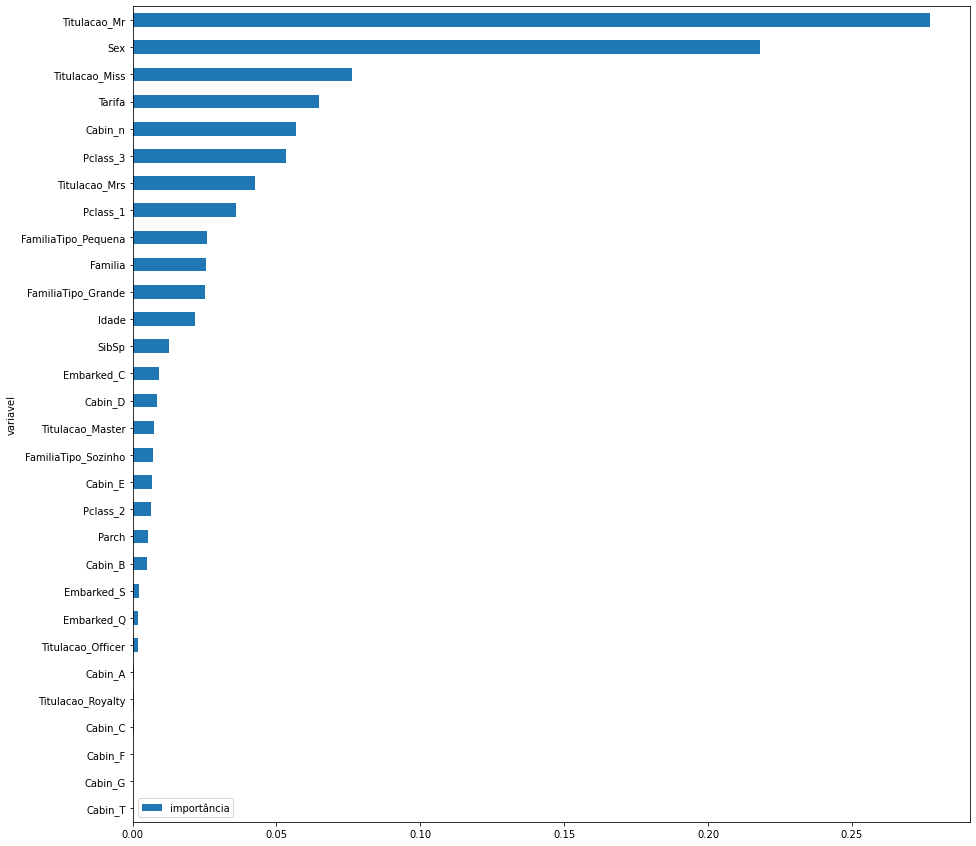

In [ ]:
#Traz de forma grafica para melhor vizualisção
variaveis.sort_values(by = 'importância', ascending = True, inplace = True)
variaveis.set_index('variavel', inplace = True)
variaveis.plot(kind='barh', figsize=(15, 15));


## **Selecionando as variáveis mais importantes com a função SelectFromModel, do scikit learn.**

In [ ]:

from sklearn.feature_selection import SelectFromModel

seletor = SelectFromModel(modelo_base, prefit = True, max_features = 11, threshold = -np.inf)#modelo base, prefit , max_features = maximo de variáveis

treino_reduzido = seletor.transform(treino)#filtra o conjunto de dados baseado no select
print(treino_reduzido.shape) 

teste_reduzido = seletor.transform(teste)#filtra o conjunto de dados para o teste
print(teste_reduzido.shape)

(891, 11)
(418, 11)


## **Melhor KNN** 

Hipertunagem de parâmetros nada mais é do que encontrar qual a melhor combinação de valores que passamos aos algoritmos no momento de seu treinamento. Algums modelos tem poucos hiperparâmetros que se deseja tunar, outros têm muitos. 

Para fazer essa checagem, testa-se através de um método de validação selecionado, o desempenho de cada possível combinação de hiperparâmetros apresentado. Logo se vê que se necessita de bastante poder computacional para realizar tal checagem. 

Na função abaixo, temos um programa que realiza a busca pelos hiperparâmetros. Veja que ela utiliza dois tipos de hipertunagem de parâmetros, o tipo = 'tudo', que testa todo espaço de parâmetros apresentado (custoso, lento, preciso), e o tipo = 'aleatorio', que testa apenas uma amostra aleatória do espaço de parâmetros (menos custoso, rápido, menos preciso). 

Nesse exemplo, estamos procurando qual é o melhor K para o KNN. Varremos todas as possibilidades de 1 até 49, de 2 em 2, o que totaliza 25 modelos diferentes para se testar. E em cada modelo, é aplicada a estratégia de validação corresponde, muitas vezes envolvendo várias iterações do K-Fold.

Devemos escolher entre as duas estratégias levando em consideração o recurso computacional que temos em mão e o tempo que podemos dispor para encontrar a solução. 

In [ ]:
#modelos de classificação
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier

from sklearn.model_selection import cross_validate
from sklearn.model_selection import RepeatedStratifiedKFold#a proporção das variáveis resposta são mantidas

#
from sklearn.model_selection import RandomizedSearchCV#procuração aleatória em validação cruzada
from sklearn.model_selection import GridSearchCV#procura em Grid em validação cruzada

In [ ]:
np.arange(1, 50, 2)

array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33,
       35, 37, 39, 41, 43, 45, 47, 49])

#Modelo de Busca Grind no KNN

In [ ]:
modelo = KNeighborsClassifier()

validacao = RepeatedStratifiedKFold(n_splits=10, n_repeats=10)# Validação utilizada

parametros = {'n_neighbors' : np.arange(1, 50, 2) }#parametros que vão variar na procura, deve ser passado como dicionario, associado a lista ou vetor que vai variar

grid_search = GridSearchCV(modelo, param_grid= parametros, #modelo usado, parametros que vão variar
                           scoring = 'accuracy', #procura da melhor métrica a ser apromorada 
                           cv = validacao,
                           verbose = 1,
                           n_jobs = -1)
grid_search.fit(treino, targets)

Fitting 100 folds for each of 25 candidates, totalling 2500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done 202 tasks      | elapsed:    3.1s
[Parallel(n_jobs=-1)]: Done 1402 tasks      | elapsed:   14.7s
[Parallel(n_jobs=-1)]: Done 2500 out of 2500 | elapsed:   25.9s finished


GridSearchCV(cv=RepeatedStratifiedKFold(n_repeats=10, n_splits=10, random_state=None),
             error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=-1,
             param_grid={'n_neighbors': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33,
       35, 37, 39, 41, 43, 45, 47, 49])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=1)

In [ ]:
grid_search.best_estimator_ #traz o melhor parâmetro encontrado
grid_search.cv_results_ #Traz todos os resultado alcançados
grid_search.cv_results_['mean_test_score']#traz as médias dos knn(1,3,5,7,...,49)

array([0.75264794, 0.78912484, 0.80124095, 0.80282022, 0.80394132,
       0.80888015, 0.79697753, 0.80011486, 0.80011236, 0.80067166,
       0.8016829 , 0.80808989, 0.81156679, 0.81202372, 0.81348564,
       0.81371036, 0.81359426, 0.81112984, 0.80967541, 0.80675531,
       0.8037216 , 0.80315855, 0.80360799, 0.80383521, 0.80057303])

###FAZER GRÀFICO COM O grid_search.cv_results_['mean_test_score']

In [ ]:
#GRAFICO DE LINHA

In [ ]:
def SearchKNN(treino, targets, tipo = 'tudo'): #Função para escolher entre busca Grid e Randomize
    parametros = {   
                 'n_neighbors' : np.arange(1, 50, 2)
                 }

    modelo = KNeighborsClassifier()
        
    validacao = RepeatedStratifiedKFold(n_splits = 10, n_repeats = 10)

    if tipo == 'tudo':
        search = GridSearchCV(modelo, param_grid = parametros,
                                  scoring = 'accuracy', cv = validacao, 
                                  verbose = 1, n_jobs = -1)#n_jobs = usa VARIOS CLUSTERS
    elif tipo == 'aleatorio':
        search = RandomizedSearchCV(modelo, param_distributions = parametros,
                                scoring = 'accuracy', cv = validacao,
                                n_iter = 10, verbose = 1, n_jobs = -1)#n_iter = quantas tentativas aleatórias ele ira tentar
    else:
        print('entrada invalida no argumento "tipo"')


    search.fit(treino, targets) 

    melhor = search.best_estimator_

    print('\nAcuracia: {:.4f}'.format(search.best_score_))
    print('Melhores parâmetros: {}\n'.format(search.best_params_))

    return melhor

knn = SearchKNN(treino_reduzido, targets, tipo = 'aleatorio')


Fitting 100 folds for each of 10 candidates, totalling 1000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done 540 tasks      | elapsed:    3.2s



Acuracia: 0.8137
Melhores parâmetros: {'n_neighbors': 35}



[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:    5.9s finished


## Melhor Árvore

In [ ]:
def GridSearchARVORE(treino, targets, tipo = 'tudo'):
  #arvore possui muito mais parâmetros que o KNN, logo o custo computacional se torna muito alto
    parametros = {   
                 'max_depth' : np.arange(1,11), #profundidade da arvore de 1 a 10
                 'min_samples_split': np.arange(2,12)#maximo de nós da arvore de 2 a 11
                 #'min_samples_leaf': np.arange(1,11),#maximo de amostras do nó, de 1 a 10
                 }

    modelo = DecisionTreeClassifier()
        
    validacao = RepeatedStratifiedKFold(n_splits = 10, n_repeats = 10)

    if tipo == 'tudo':
        grid_search = GridSearchCV(modelo, param_grid = parametros,
                                  scoring = 'accuracy', cv = validacao, 
                                  verbose = 1, n_jobs = -1)
    elif tipo == 'aleatorio':
        grid_search = RandomizedSearchCV(modelo, param_distributions = parametros,
                                scoring = 'accuracy', cv = validacao,
                                n_iter = 50, verbose = 1, n_jobs = -1)
    else:
        print('entrada invalida no argumento "tipo"')


    grid_search.fit(treino, targets) 

    melhor = grid_search.best_estimator_

    print('\nAcuracia: {:.4f}'.format(grid_search.best_score_))
    print('Melhores parâmetros: {}\n'.format(grid_search.best_params_))

    return melhor

arvore = GridSearchARVORE(treino, targets, tipo = 'aleatorio')

Fitting 100 folds for each of 50 candidates, totalling 5000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done 956 tasks      | elapsed:    3.9s



Acuracia: 0.8213
Melhores parâmetros: {'min_samples_split': 5, 'max_depth': 4}



[Parallel(n_jobs=-1)]: Done 5000 out of 5000 | elapsed:   19.1s finished


## Melhor Random Forest

In [ ]:
def GridSearchRF(treino, targets, tipo = 'tudo'):
    parametros = {   
                 'max_depth' : [2, 4, 6, 8, 10], #profundidade com 5 parametros
                 'n_estimators': [50, 100, 150], # Tamnaho da Floresta
                 'max_features': ['sqrt', 'auto', 'log2'], #tamanho do numero de colunas usados para montar a arvore
                 'min_samples_split': [2, 5, 10], #minimo de amostras no nó
                 'min_samples_leaf': [1, 3, 5], #minimo de amostras nas folhas
                 'bootstrap': [True, False] #se vai fazer boostrap dos dados
                 }

    modelo = RandomForestClassifier()
        
    validacao = RepeatedStratifiedKFold(n_splits = 10, n_repeats = 1)

    if tipo == 'tudo':
        grid_search = GridSearchCV(modelo, param_grid = parametros,
                                  scoring = 'accuracy', cv = validacao, 
                                  verbose = 1, n_jobs = -1)
    elif tipo == 'aleatorio':
        grid_search = RandomizedSearchCV(modelo, param_distributions = parametros,
                                scoring = 'accuracy', cv = validacao,
                                n_iter = 50, verbose = 1, n_jobs = -1)
    else:
        print('entrada invalida no argumento "tipo"')


    grid_search.fit(treino, targets) 

    melhor_rf = grid_search.best_estimator_

    print('\nAcuracia: {:.4f}'.format(grid_search.best_score_))
    print('Melhores parâmetros: {}\n'.format(grid_search.best_params_))

    return melhor_rf

rf = GridSearchRF(treino_reduzido, targets, tipo = 'tudo')


Fitting 10 folds for each of 810 candidates, totalling 8100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  88 tasks      | elapsed:   11.7s
[Parallel(n_jobs=-1)]: Done 388 tasks      | elapsed:   50.9s
[Parallel(n_jobs=-1)]: Done 888 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 1588 tasks      | elapsed:  3.5min
[Parallel(n_jobs=-1)]: Done 2488 tasks      | elapsed:  5.7min
[Parallel(n_jobs=-1)]: Done 3588 tasks      | elapsed:  8.3min
[Parallel(n_jobs=-1)]: Done 4888 tasks      | elapsed: 10.8min
[Parallel(n_jobs=-1)]: Done 6388 tasks      | elapsed: 13.6min
[Parallel(n_jobs=-1)]: Done 8088 tasks      | elapsed: 17.0min



Acuracia: 0.8406
Melhores parâmetros: {'bootstrap': False, 'max_depth': 6, 'max_features': 'log2', 'min_samples_leaf': 3, 'min_samples_split': 2, 'n_estimators': 50}



[Parallel(n_jobs=-1)]: Done 8100 out of 8100 | elapsed: 17.0min finished


In [ ]:
rf

RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=6, max_features='log2',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=50,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

## Observação: Se o conjunto de dados de entrada for alterado, então a otimização de parâmetros deve ser refeita! O melhor conjunto de hiperparâmetros pode ser único para cada tipo de pré-processamento utilizado

In [ ]:
rf1 = GridSearchRF(treino_reduzido, targets, tipo = 'aleatorio')


Fitting 10 folds for each of 50 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:    5.9s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:   24.5s
[Parallel(n_jobs=-1)]: Done 446 tasks      | elapsed:   59.3s



Acuracia: 0.8328
Melhores parâmetros: {'n_estimators': 50, 'min_samples_split': 10, 'min_samples_leaf': 1, 'max_features': 'log2', 'max_depth': 6, 'bootstrap': False}



[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:  1.1min finished


#Criando uma Submissão para o Kaggle

In [ ]:
# Função para criar arquivos de submissão no Kaggle

def Submissao(treino, targets, teste, modelo, nome = 'submissaoKaggle'):
  
    modelo.fit(treino, targets)
    pred = modelo.predict(teste)

    url = 'https://raw.githubusercontent.com/LeandroCoelhos/datasets/main/Titanic/test.csv' 
    subm = pd.read_csv(url, usecols = ['PassengerId'] )  
    subm['Survived'] = pred
    
    subm.to_csv(nome + '.csv', index = False)  

In [ ]:
#Bloco para gerar submissao

modelo = rf1 #modelo utilizado
nome = 'GridSearchRF-SetupXYZred' #nome do arquivo
Submissao(treino_reduzido, targets, teste_reduzido, modelo, nome)

---

In [ ]:
# Criando uma combinação Hard e uma Soft dos algoritmos otimizados nesse script + Regressão Logística.
# Preparando e submetendo direto no Kaggle.

from sklearn.ensemble import VotingClassifier
 
reglog = LogisticRegression() 

modelos = [('Reg. Log.', reglog), ('KNN', knn), ('Árvore', arvore), ('RF', rf) ]

modelo1 = VotingClassifier(modelos, voting = 'hard')
modelo2 = VotingClassifier(modelos, voting = 'soft')


modelo = modelo1
nome = 'SubmissaoCombinacaoHard' 
Submissao(treino_reduzido, targets, teste_reduzido, modelo, nome)

modelo = modelo2
nome = 'SubmissaoCombinacaoSoft' 
Submissao(treino_reduzido, targets, teste_reduzido, modelo, nome)
